<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Actividad 3: Análisis de Componentes Principales

El análisis de componentes principales (PCA) es un método de aprendizaje automático no supervisado que normalmente se utiliza para la reducción de la dimensionalidad. En muchos casos, sin embargo, también puede ayudar a comprender la información contenida en los datos. Por lo general, el proceso de PCA implica obtener los vectores propios y los valores propios que los acompañan utilizando la covarianza de los datos (o matriz de correlación).


#### 1. Considere el dataset que se encuentra en la carpeta Data "wine.csv". Haciendo uso de su librería realizar lo siguiente:


> 1.- Realizar un reporte de calidad de datos.

> 2.- Realizar un Análisis Exploratorio de Datos y obtener 3 insights.

> 3.- Crear un dataset X_df sin considerar la columna ['Class'], crear y_df con la columna ['Class'].

> 4.- Obtener una matrix de correlación para X_df y graficarla.

> 5.- Estandarizar los datos de X_df (X_df_std).

> 6.- Aplicar el algoritmo PCA.

> 7.- Mostrar la varianza de cada eigenvector y graficar la varianza acumulada.

> 8.- Elegir los componentes principales de tal forma que se tenga al menos el 85% de la información total.

> 9.- Crear dos modelos de clasificación usando Arboles de desición para los datos originales, y otro para los datos obtenidos después de aplicar PCA


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
data_wine = pd.read_csv('Data/wine.csv', index_col=[0])

In [7]:
data_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from HAIA import HyAIA as hy

In [9]:
#1.- Realizar un reporte de calidad de datos.
wine = hy(data_wine)

In [10]:
wine.dqr
#Datos limpios

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,Is_Categorical
Class,Class,int64,178,0,3,3.00,1.00,1.938202,False
Alcohol,Alcohol,float64,178,0,126,14.83,11.03,13.000618,False
Malic acid,Malic acid,float64,178,0,133,5.80,0.74,2.336348,False
Ash,Ash,float64,178,0,79,3.23,1.36,2.366517,False
Alcalinity of ash,Alcalinity of ash,float64,178,0,63,30.00,10.60,19.494944,False
Magnesium,Magnesium,int64,178,0,53,162.00,70.00,99.741573,False
Total phenols,Total phenols,float64,178,0,97,3.88,0.98,2.295112,False
Flavanoids,Flavanoids,float64,178,0,132,5.08,0.34,2.029270,False
Nonflavanoid phenols,Nonflavanoid phenols,float64,178,0,39,0.66,0.13,0.361854,False
Proanthocyanins,Proanthocyanins,float64,178,0,101,3.58,0.41,1.590899,False


In [11]:
#2.- Realizar un Análisis Exploratorio de Datos y obtener 3 insights.
data_wine['Class'].unique()


array([1, 2, 3], dtype=int64)

In [13]:
#1insight
data_wine.groupby(['Class'])['Alcohol'].value_counts()

Class  Alcohol
1      13.05      4
       13.24      2
       13.56      2
       13.83      2
       14.06      2
                 ..
3      13.84      1
       13.88      1
       14.13      1
       14.16      1
       14.34      1
Name: Alcohol, Length: 144, dtype: int64

In [14]:
#2insight
data_wine['Class'].value_counts()
#crear figura de barras

2    71
1    59
3    48
Name: Class, dtype: int64

In [17]:
data_wine.columns.to_list()

['Class',
 'Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [19]:
#3er insight Promedio de alchool en cada clase de vino
for col in data_wine.columns.to_list()[1:]:
    mean_class_atribute = data_wine.groupby(['Class'])[col].mean()
    print(f'Promedio de {col} en cada clase de vino: \n{mean_class_atribute}')
    #Crear una grafica de barras para cada atributo en cada iteración

Promedio de Alcohol en cada clase de vino: 
Class
1    13.744746
2    12.278732
3    13.153750
Name: Alcohol, dtype: float64
Promedio de Malic acid en cada clase de vino: 
Class
1    2.010678
2    1.932676
3    3.333750
Name: Malic acid, dtype: float64
Promedio de Ash en cada clase de vino: 
Class
1    2.455593
2    2.244789
3    2.437083
Name: Ash, dtype: float64
Promedio de Alcalinity of ash en cada clase de vino: 
Class
1    17.037288
2    20.238028
3    21.416667
Name: Alcalinity of ash, dtype: float64
Promedio de Magnesium en cada clase de vino: 
Class
1    106.338983
2     94.549296
3     99.312500
Name: Magnesium, dtype: float64
Promedio de Total phenols en cada clase de vino: 
Class
1    2.840169
2    2.258873
3    1.678750
Name: Total phenols, dtype: float64
Promedio de Flavanoids en cada clase de vino: 
Class
1    2.982373
2    2.080845
3    0.781458
Name: Flavanoids, dtype: float64
Promedio de Nonflavanoid phenols en cada clase de vino: 
Class
1    0.290000
2    0.363662
3  

In [20]:
#3.- Crear un dataset X_df sin considerar la columna ['Class'], crear y_df con la columna ['Class'].
X_df = data_wine.iloc[:,1:]
y_df = data_wine.iloc[:,0]

In [22]:
X_df.shape, y_df.shape

((178, 13), (178,))

In [23]:
X_df.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [25]:
#4.- Obtener una matrix de correlación para X_df y graficarla.
help(data_wine.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and S

In [26]:
X_corr = X_df.corr()
X_corr

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:>

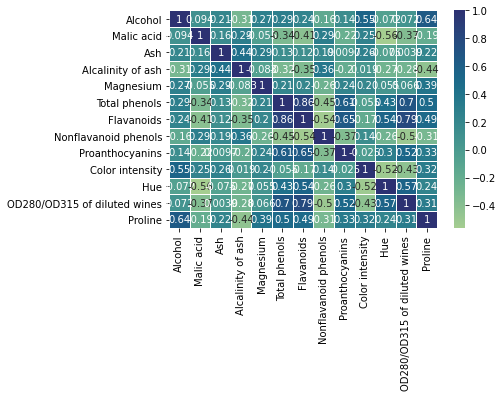

In [31]:
sns.heatmap(X_corr, annot=True, linewidth=0.5, cmap='crest')

In [32]:
#5.- Estandarizar los datos de X_df (X_df_std).
#Usando StandardScaler
from sklearn.preprocessing import StandardScaler


In [35]:
sc = StandardScaler()
sc.fit(X_df)
X_df_std = sc.transform(X_df)


In [ ]:
#6.- Aplicar el algoritmo PCA.
